In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("../Datasets/Occupancy_Estimation.csv")
df.replace(' NA', None, inplace=True)
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.drop(['Date', 'Time'], axis=1)
datetime_index = df.columns.get_loc('DateTime')
df.insert(0, 'DateTime', df.pop('DateTime'))
#df = df[df['DateTime'].dt.year != 2018]  # Filter rows where the year is not 2018
df.set_index('DateTime', inplace=True)
min_datetime = df.index.min()
new_index = pd.date_range(start=min_datetime, periods=len(df), freq='30S')

shrunken_df = pd.DataFrame(index=new_index)
shrunken_df = shrunken_df.merge(df, how='left', left_index=True, right_index=True)
shrunken_df.interpolate(method='time', inplace=True)
shrunken_df.reset_index(inplace=True)
shrunken_df.columns = ['DateTime'] + shrunken_df.columns[1:].tolist()
df_a = shrunken_df.iloc[:,:-1]
df_b = df.iloc[:,-1:]
final_df = pd.concat([df_a.reset_index(),df_b.reset_index()],axis=1).drop(['index'],axis=1)
final_df = final_df.loc[:, ~final_df.columns.duplicated()]

final_df

,DateTime,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017-12-22 10:49:41,24.940000,24.750000,24.560000,25.380000,121.0000,34.000000,53.000000,40.000,0.080000,0.190000,0.06000,0.060000,390.000000,0.769231,0.000000,0.0,1
1,2017-12-22 10:50:11,24.946458,24.753958,24.563958,25.385208,121.0625,34.041667,53.166667,40.125,0.094167,0.191667,0.06375,0.061458,390.833333,0.778205,0.020833,0.0,1
2,2017-12-22 10:50:41,24.952917,24.757917,24.567917,25.390417,121.1250,34.083333,53.333333,40.250,0.108333,0.193333,0.06750,0.062917,391.666667,0.787179,0.041667,0.0,1
3,2017-12-22 10:51:11,24.959375,24.761875,24.571875,25.395625,121.1875,34.125000,53.500000,40.375,0.122500,0.195000,0.07125,0.064375,392.500000,0.796154,0.062500,0.0,1
4,2017-12-22 10:51:41,24.965833,24.765833,24.575833,25.400833,121.2500,34.166667,53.666667,40.500,0.136667,0.196667,0.07500,0.065833,393.333333,0.805128,0.083333,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2017-12-25 23:11:41,25.380000,25.440000,25.060000,25.880000,0.0000,0.000000,0.000000,0.000,0.080000,0.050000,0.06000,0.100000,355.000000,0.000000,0.000000,0.0,0
10125,2017-12-25 23:12:11,25.380000,25.440000,25.060000,25.880000,0.0000,0.000000,0.000000,0.000,0.080000,0.050000,0.06000,0.100000,355.000000,0.000000,0.000000,0.0,0
10126,2017-12-25 23:12:41,25.380000,25.440000,25.060000,25.880000,0.0000,0.000000,0.000000,0.000,0.080000,0.050000,0.06000,0.100000,355.000000,0.000000,0.000000,0.0,0
10127,2017-12-25 23:13:11,25.380000,25.440000,25.060000,25.880000,0.0000,0.000000,0.000000,0.000,0.080000,0.050000,0.06000,0.100000,355.000000,0.000000,0.000000,0.0,0


In [2]:
final_df = pd.read_csv('../../Datasets/Electrical_Grid.csv')

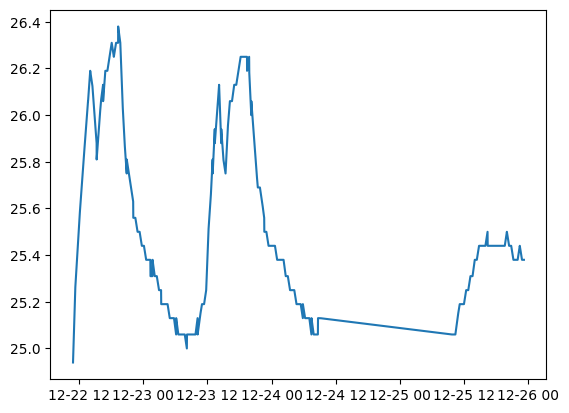

In [20]:
plt.plot(final_df['DateTime'],final_df['S1_Temp'])
plt.show()

<Axes: >

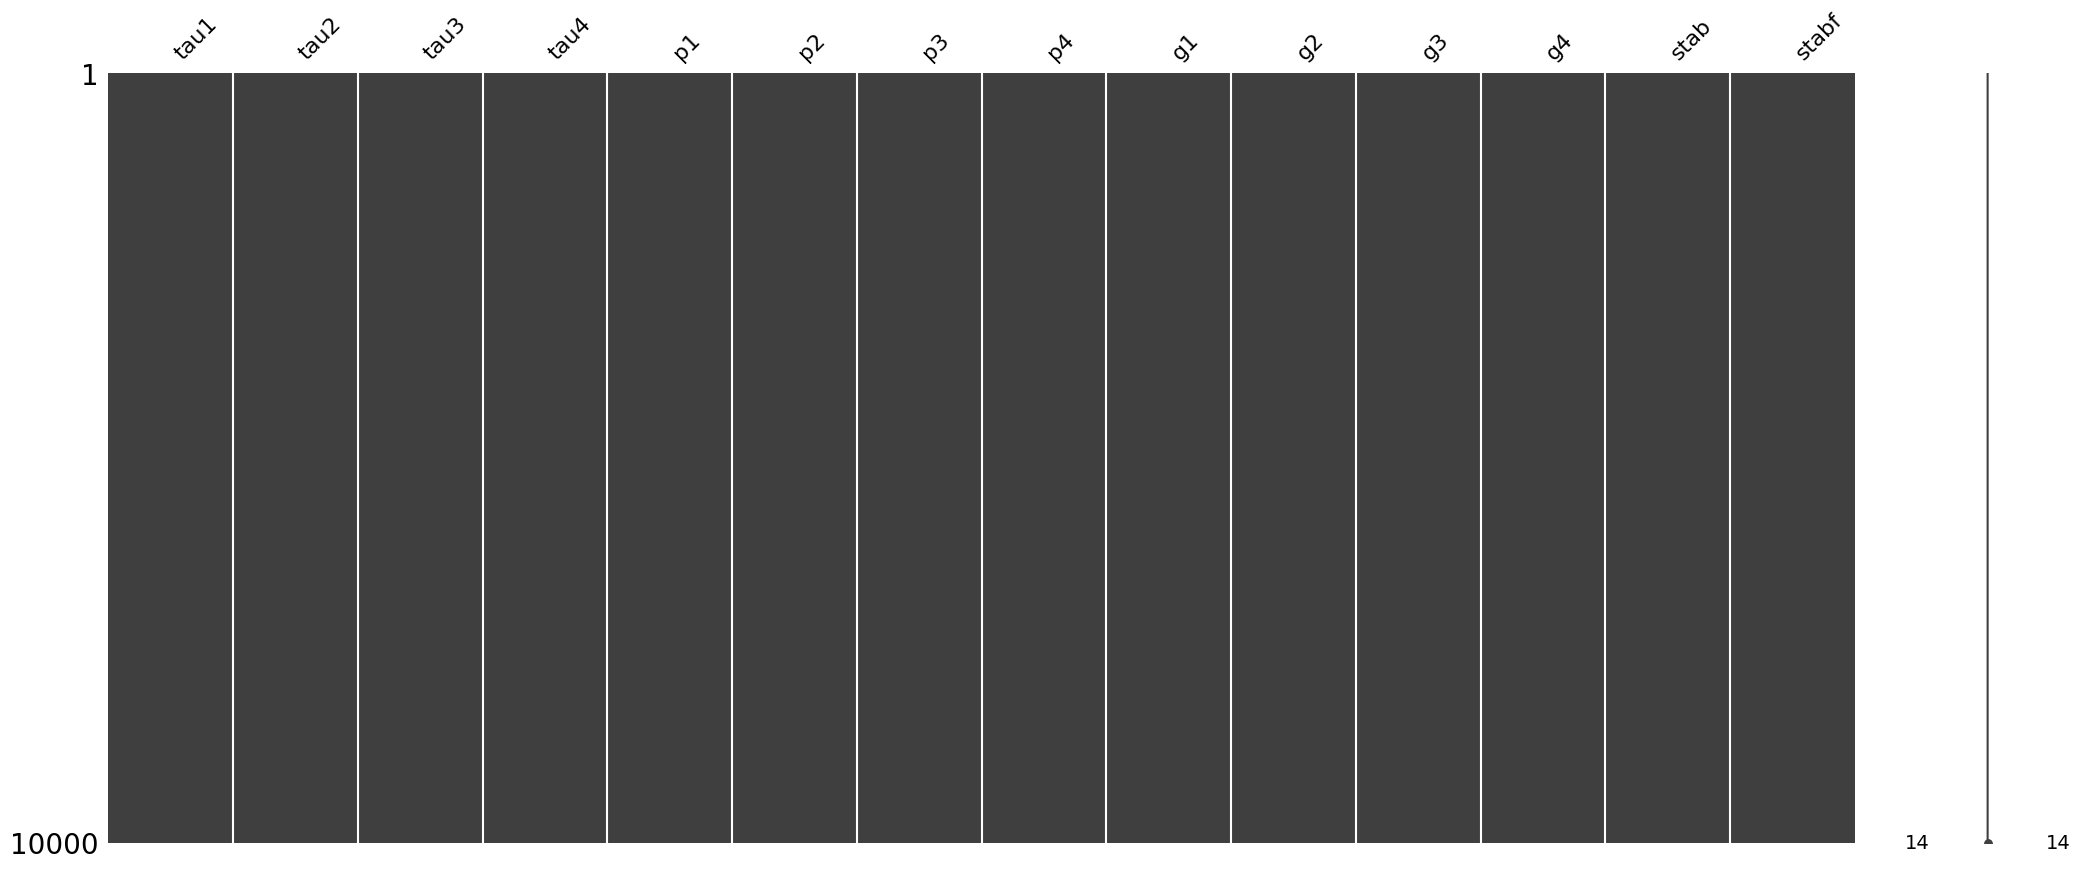

In [3]:
import missingno as mno
mno.matrix(final_df)

In [5]:
final_df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [4]:
from scipy.stats import zscore

df_nan = df.fillna(np.nan)
df_nan = df_nan.apply(pd.to_numeric, errors='ignore')

cols = df.columns[1:]
z=np.nan_to_num(df_nan.select_dtypes(include=np.number).apply(zscore, nan_policy='omit'),0)
z=[z>3]
z = np.squeeze(z)
z

NameError: name 'df' is not defined

In [6]:
for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        if z[i, j]:
            df.iloc[i, j+1] = None
            df_nan.iloc[i,j+1] = np.nan


<Axes: >

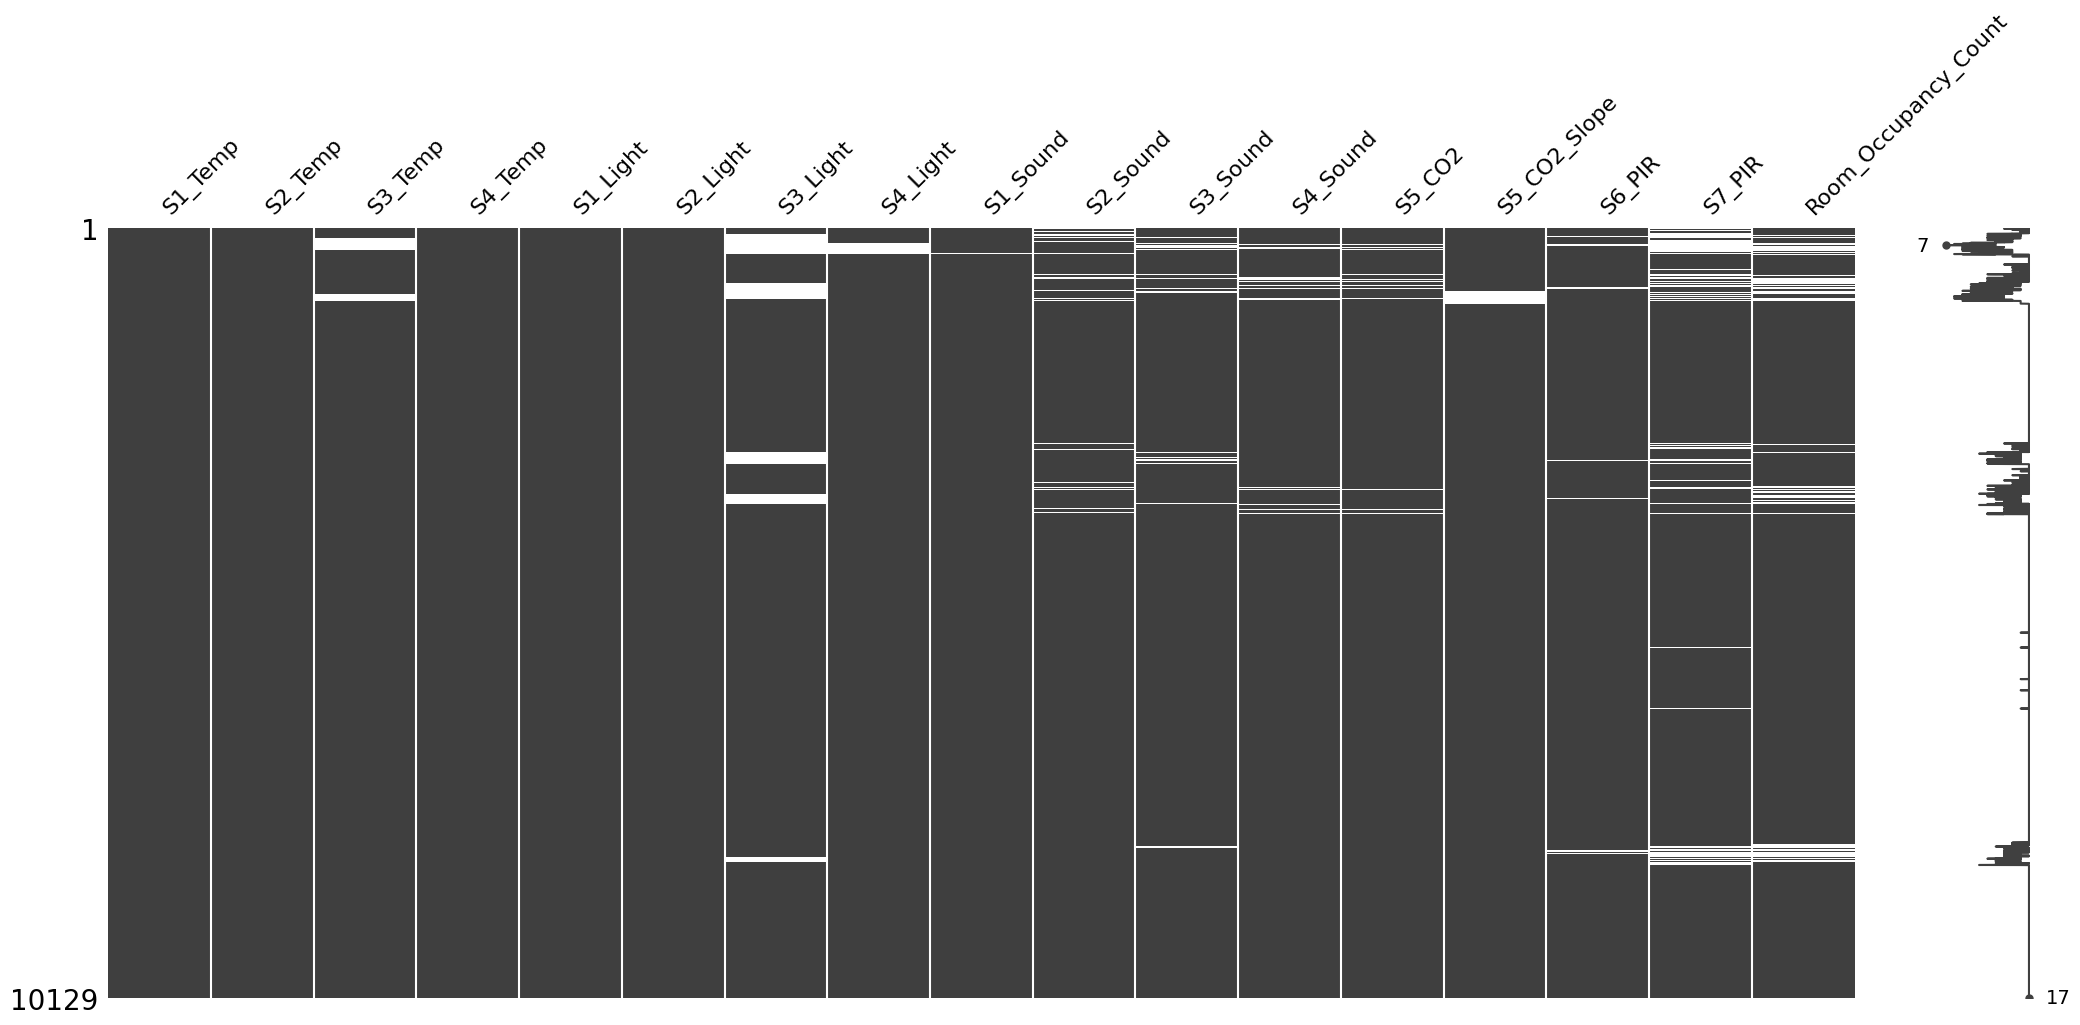

In [7]:
import missingno as mno
mno.matrix(df)

In [8]:
null_counts = df.isnull().sum()

total_rows = df.shape[0]
null_percentages = (null_counts / total_rows) * 100

null_info = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentages})

print(null_info)

                      Null Count  Null Percentage
S1_Temp                        0         0.000000
S2_Temp                        0         0.000000
S3_Temp                      241         2.379307
S4_Temp                        0         0.000000
S1_Light                       0         0.000000
S2_Light                       0         0.000000
S3_Light                     837         8.263402
S4_Light                     155         1.530260
S1_Sound                      29         0.286307
S2_Sound                     229         2.260835
S3_Sound                     187         1.846184
S4_Sound                     246         2.428670
S5_CO2                       201         1.984401
S5_CO2_Slope                 176         1.737585
S6_PIR                       106         1.046500
S7_PIR                       913         9.013723
Room_Occupancy_Count         806         7.957350


In [9]:
rows_with_null = df.isnull().any(axis=1)

total_rows = df.shape[0]
rows_with_null_percentage = (rows_with_null.sum() / total_rows) * 100

print(f"Percentage of rows with at least one null value: {rows_with_null_percentage:.2f}%")

Percentage of rows with at least one null value: 15.17%


In [10]:
rows_with_null = df.isnull().any(axis=1)
rows_with_null = pd.DataFrame(rows_with_null)
rows_with_null.replace(True,None,inplace=True)

<Axes: >

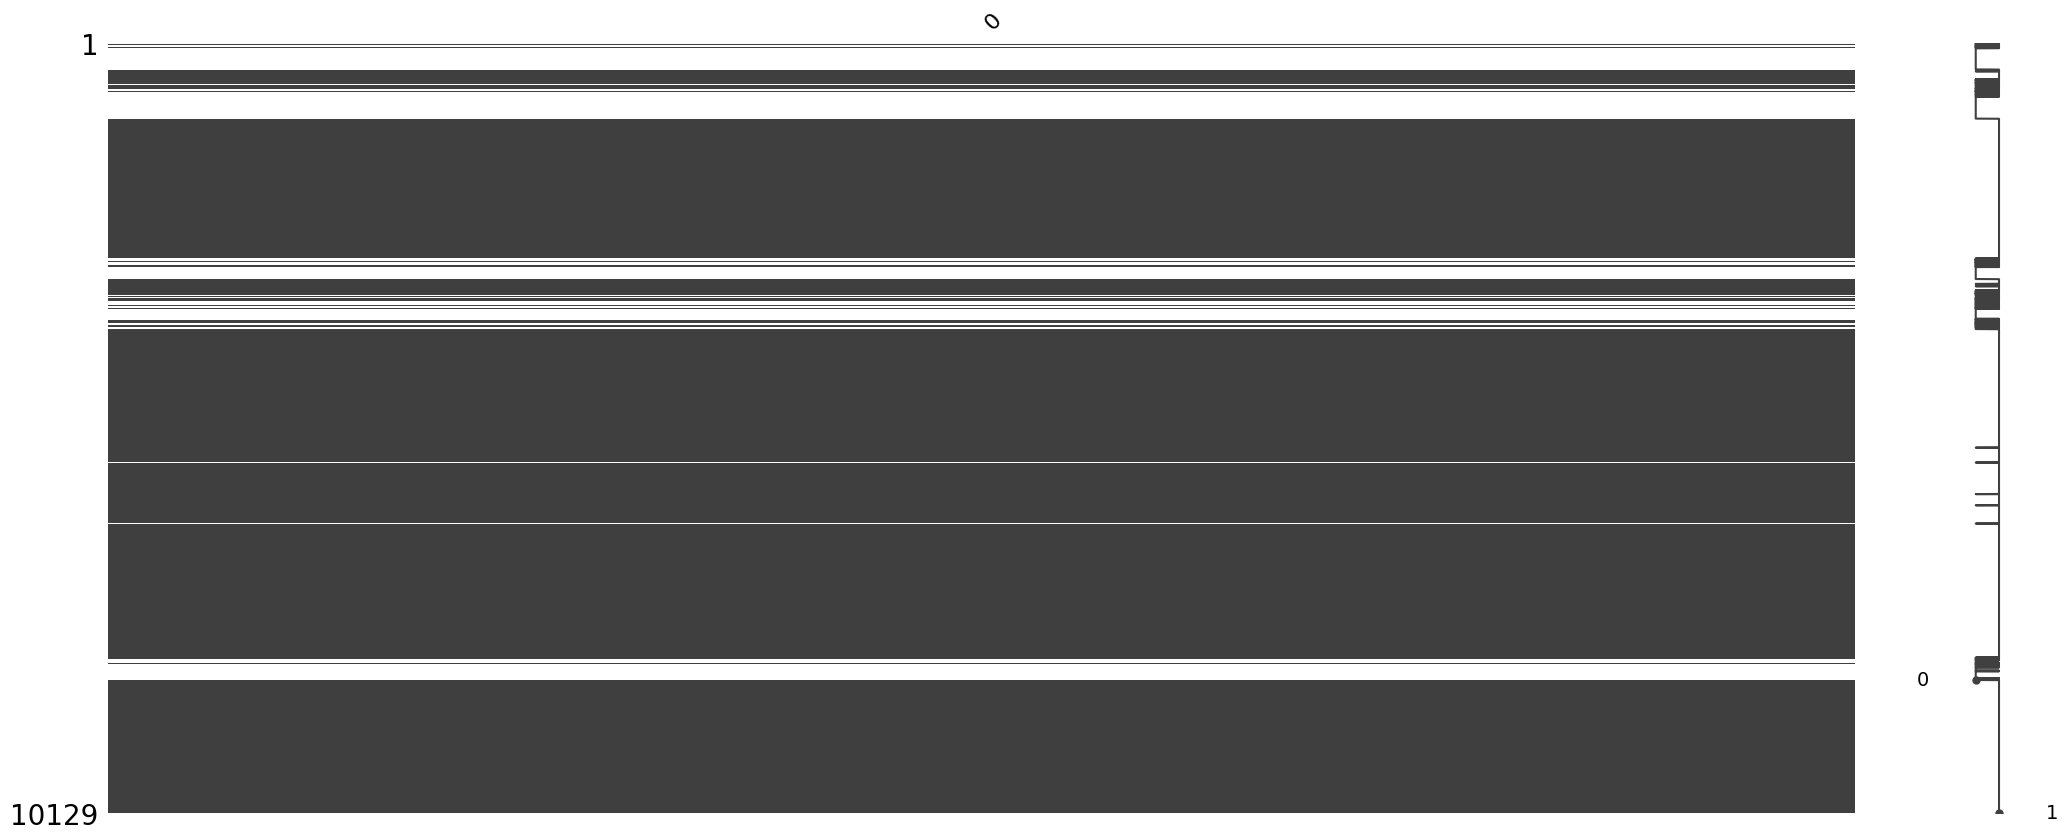

In [11]:
mno.matrix(rows_with_null)

In [12]:
df_nan = df_nan.interpolate()

In [13]:
df_nan = df_nan.ffill().bfill()
df_nan

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53.0,40.0,0.08,0.19,0.06,0.06,390.0,0.769231,0.0,0.0,1.0
1,24.94,24.75,24.56,25.44,121,33,53.0,40.0,0.93,0.05,0.06,0.06,390.0,0.646154,0.0,0.0,1.0
2,25.00,24.75,24.50,25.44,121,34,53.0,40.0,0.43,0.11,0.08,0.06,390.0,0.519231,0.0,0.0,1.0
3,25.00,24.75,24.56,25.44,121,34,53.0,40.0,0.41,0.10,0.10,0.09,390.0,0.388462,0.0,0.0,1.0
4,25.00,24.75,24.56,25.44,121,34,54.0,40.0,0.18,0.06,0.06,0.06,390.0,0.253846,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,25.06,25.13,24.69,25.31,6,7,33.0,22.0,0.09,0.04,0.06,0.08,345.0,0.000000,0.0,0.0,0.0
10125,25.06,25.06,24.69,25.25,6,7,34.0,22.0,0.07,0.05,0.05,0.08,345.0,0.000000,0.0,0.0,0.0
10126,25.13,25.06,24.69,25.25,6,7,34.0,22.0,0.11,0.05,0.06,0.08,345.0,0.000000,0.0,0.0,0.0
10127,25.13,25.06,24.69,25.25,6,7,34.0,22.0,0.08,0.08,0.10,0.08,345.0,0.000000,0.0,0.0,0.0


In [22]:
final_df.to_csv("../Datasets/Occupancy_Estimation_Used.csv", na_rep=' NA', index=False)